In [ ]:
pip install tensorflow numpy scikit-learn matplotlib streamlit requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.6 MB/s eta 0:00:00


In [ ]:
import requests

datasets_to_download = {
    'shakespeare.txt': 'https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt',
    'linux.txt': 'https://cs.stanford.edu/people/karpathy/char-rnn/linux_input.txt'
}

for filename, url in datasets_to_download.items():
    try:
        r = requests.get(url)
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(r.text)
        print(f"Successfully downloaded {filename}")
    except Exception as e:
        print(f"Error downloading {filename}: {e}")

Successfully downloaded shakespeare.txt
Successfully downloaded linux.txt


In [ ]:
import re
import numpy as np
from collections import Counter
import pickle

# --- Configuration ---
CONTEXT_LENGTH = 5  # How many words to use as context
processed_data = {} # Dictionary to store all our data

# --- Preprocessing Functions ---

def preprocess_cat1(text):
    """Preprocessor for Category I: Natural Language."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9 \.]', '', text) # Keep only letters, numbers, space, dot
    words = text.split()
    return words

def preprocess_cat2(text):
    """Preprocessor for Category II: Structured Text (Code)."""
    text = text.lower()
    # Add spaces around special characters to treat them as tokens
    text = re.sub(r'([=\(\)\[\]\{\}\.,:;!@#$%^&\*\-+=<>/\\])', r' \1 ', text)
    words = text.split()
    return words

def build_vocab(words):
    """Builds vocabulary mappings and frequency counts."""
    word_counts = Counter(words)
    # Sort vocab alphabetically for consistent mappings
    vocab = sorted(list(word_counts.keys()))
    vocab_size = len(vocab)

    stoi = {word: i for i, word in enumerate(vocab)}
    itos = {i: word for i, word in enumerate(vocab)}

    return stoi, itos, vocab_size, word_counts

def create_dataset(words, stoi, context_length):
    """Creates X, y pairs for training."""
    X = []
    y = []
    # Convert all words to indices first
    indexed_words = [stoi[w] for w in words]

    for i in range(len(indexed_words) - context_length):
        X.append(indexed_words[i : i + context_length])
        y.append(indexed_words[i + context_length])

    return np.array(X), np.array(y)

# --- Define Datasets ---
DATASETS_CONFIG = {
    'shakespeare': {
        'file': 'shakespeare.txt',
        'preprocess_fn': preprocess_cat1
    },
    'linux': {
        'file': 'linux.txt',
        'preprocess_fn': preprocess_cat2
    }
}

# --- Main Processing Loop ---
for name, config in DATASETS_CONFIG.items():
    print(f"\n--- Processing Dataset: {name} ---")

    # 1. Load and Preprocess
    with open(config['file'], 'r', encoding='utf-8') as f:
        text = f.read()
    words = config['preprocess_fn'](text)

    # 2. Build Vocab
    stoi, itos, vocab_size, word_counts = build_vocab(words)

    # 3. Report Stats
    print(f"Vocabulary Size: {vocab_size}")
    print(f"10 Most Frequent: {word_counts.most_common(10)}")
    print(f"10 Least Frequent: {word_counts.most_common()[-10:]}")

    # 4. Create X, y
    X, y = create_dataset(words, stoi, CONTEXT_LENGTH)
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # 5. Store all data
    processed_data[name] = {
        'X': X,
        'y': y,
        'stoi': stoi,
        'itos': itos,
        'vocab_size': vocab_size,
        'context_length': CONTEXT_LENGTH
    }

# Save mappings for later use (e.g., in Streamlit)
with open('processed_data.pkl', 'wb') as f:
    pickle.dump(processed_data, f)


--- Processing Dataset: shakespeare ---
Vocabulary Size: 114121
10 Most Frequent: [('the', 21822), ('and', 15633), ('of', 14782), ('to', 14545), ('i', 14251), ('a', 11406), ('you', 10306), ('my', 10298), ('in', 8824), ('is', 7653)]
10 Least Frequent: [('evermore.prince', 1), ('tears.bastardo', 1), ('woesince', 1), ('beforehand', 1), ('griefs.this', 1), ('shalllie', 1), ('conquerorbut', 1), ('itself.now', 1), ('againcome', 1), ('rueif', 1)]
X shape: (696115, 5), y shape: (696115,)

--- Processing Dataset: linux ---
Vocabulary Size: 37619
10 Most Frequent: [('*', 85453), (')', 84196), ('(', 84066), (';', 77900), (',', 55127), ('-', 44962), ('=', 39706), ('>', 37119), ('/', 31988), ('.', 29100)]
10 Least Frequent: [('rcu_irq_', 1), ('trace_user_enter', 1), ('vtime', 1), ('entrancy', 1), ('vtime_user_exit', 1), ('trace_user_exit', 1), ('context_kernel', 1), ('tif', 1), ('config_context_tracking_force', 1), ('context_tracking_init', 1)]
X shape: (1408186, 5), y shape: (1408186,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# --- Cell 1: Preprocessing Script (Part 1.1) ---
import requests
import re
import numpy as np
from collections import Counter
import pickle
import os

# --- 1. Define Your Google Drive Project Folder ---
GDRIVE_PROJECT_DIR = '/content/drive/MyDrive/ML_Assignment3'
if not os.path.exists(GDRIVE_PROJECT_DIR):
    os.makedirs(GDRIVE_PROJECT_DIR)

# --- 2. Download Data ---
datasets_to_download = {
    'shakespeare.txt': 'https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt',
    'linux.txt': 'https://cs.stanford.edu/people/karpathy/char-rnn/linux_input.txt'
}

for filename, url in datasets_to_download.items():
    try:
        r = requests.get(url)
        # Save to Colab's local temporary storage
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(r.text)
        print(f"Successfully downloaded {filename}")
    except Exception as e:
        print(f"Error downloading {filename}: {e}")

# --- 3. Configuration ---
CONTEXT_LENGTH = 5  # How many words to use as context
processed_data = {} # Dictionary to store all our data
PROCESSED_DATA_FILE = os.path.join(GDRIVE_PROJECT_DIR, 'processed_data.pkl')

# --- 4. Preprocessing Functions ---
def preprocess_cat1(text):
    """Preprocessor for Category I: Natural Language."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9 \.]', '', text) # Keep only letters, numbers, space, dot
    words = text.split()
    return words

def preprocess_cat2(text):
    """Preprocessor for Category II: Structured Text (Code)."""
    text = text.lower()
    # Add spaces around special characters to treat them as tokens
    text = re.sub(r'([=\(\)\[\]\{\}\.,:;!@#$%^&\*\-+=<>/\\])', r' \1 ', text)
    words = text.split()
    return words

def build_vocab(words):
    """Builds vocabulary mappings and frequency counts."""
    word_counts = Counter(words)
    vocab = sorted(list(word_counts.keys()))
    vocab_size = len(vocab)

    stoi = {word: i for i, word in enumerate(vocab)}
    itos = {i: word for i, word in enumerate(vocab)}

    return stoi, itos, vocab_size, word_counts

def create_dataset(words, stoi, context_length):
    """Creates X, y pairs for training."""
    X = []
    y = []
    indexed_words = [stoi[w] for w in words]

    for i in range(len(indexed_words) - context_length):
        X.append(indexed_words[i : i + context_length])
        y.append(indexed_words[i + context_length])

    return np.array(X), np.array(y)

# --- 5. Define Datasets ---
DATASETS_CONFIG = {
    'shakespeare': {
        'file': 'shakespeare.txt',
        'preprocess_fn': preprocess_cat1
    },
    'linux': {
        'file': 'linux.txt',
        'preprocess_fn': preprocess_cat2
    }
}

# --- 6. Main Processing Loop ---
for name, config in DATASETS_CONFIG.items():
    print(f"\n--- Processing Dataset: {name} ---")

    with open(config['file'], 'r', encoding='utf-8') as f:
        text = f.read()
    words = config['preprocess_fn'](text)

    stoi, itos, vocab_size, word_counts = build_vocab(words)

    print(f"Vocabulary Size: {vocab_size}")
    print(f"10 Most Frequent: {word_counts.most_common(10)}")
    print(f"10 Least Frequent: {word_counts.most_common()[-10:]}")

    X, y = create_dataset(words, stoi, CONTEXT_LENGTH)
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    processed_data[name] = {
        'X': X,
        'y': y,
        'stoi': stoi,
        'itos': itos,
        'vocab_size': vocab_size,
        'context_length': CONTEXT_LENGTH
    }

# --- 7. Save Processed Data to Google Drive ---
print(f"\nSaving processed data to: {PROCESSED_DATA_FILE}")
with open(PROCESSED_DATA_FILE, 'wb') as f:
    pickle.dump(processed_data, f)

print("--- Part 1.1 Complete. Data saved to Google Drive. ---")

Successfully downloaded shakespeare.txt
Successfully downloaded linux.txt

--- Processing Dataset: shakespeare ---
Vocabulary Size: 114121
10 Most Frequent: [('the', 21822), ('and', 15633), ('of', 14782), ('to', 14545), ('i', 14251), ('a', 11406), ('you', 10306), ('my', 10298), ('in', 8824), ('is', 7653)]
10 Least Frequent: [('evermore.prince', 1), ('tears.bastardo', 1), ('woesince', 1), ('beforehand', 1), ('griefs.this', 1), ('shalllie', 1), ('conquerorbut', 1), ('itself.now', 1), ('againcome', 1), ('rueif', 1)]
X shape: (696115, 5), y shape: (696115,)

--- Processing Dataset: linux ---
Vocabulary Size: 37619
10 Most Frequent: [('*', 85453), (')', 84196), ('(', 84066), (';', 77900), (',', 55127), ('-', 44962), ('=', 39706), ('>', 37119), ('/', 31988), ('.', 29100)]
10 Least Frequent: [('rcu_irq_', 1), ('trace_user_enter', 1), ('vtime', 1), ('entrancy', 1), ('vtime_user_exit', 1), ('trace_user_exit', 1), ('context_kernel', 1), ('tif', 1), ('config_context_tracking_force', 1), ('context

--- 1.2: Reporting for Category: linux ---
Loading all processed data and trained model...
Model, history, and vocab loaded successfully.

--- Report 1.2 ---
Saved plot to /content/drive/MyDrive/ML_Assignment3/linux_loss_accuracy_plot.png


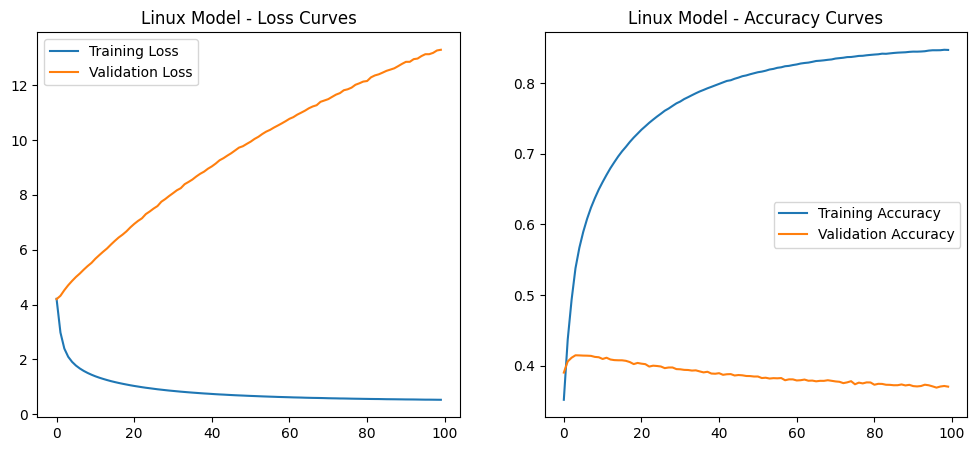

Final Validation Loss: 13.2931
Final Validation Accuracy: 0.3702

Seed: '! = ( struct file' (Note: Seed must contain words from vocab)
Generated: ' !   =   (  struct file ) ) ; cpumask_var_t new_value ; int err ; if ( ! alloc_cpumask_var ( & new_mask , gfp_kernel ) ) return - enomem ; / * * adjust the priority'

--- Commentary on Learning ---
The Linux model learned syntactic structure fairly quickly.
The generated text/code looks syntactically plausible but is semantically nonsense.
This is because the context is small (5 words) and the MLP model has no memory.
It's enough to learn simple patterns (e.g., 'if ( ... )' or 'king and queen') but not long-range dependencies or true meaning.
------------------
--- Part 1.2 Reporting Complete ---


In [ ]:
# --- Cell 4: Reporting Script (Part 1.2 - Report) - LINUX ---
#
# You can run this script anytime AFTER training is complete.
# It loads the saved model and history from Google Drive.
#
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import re # <-- Import re for preprocessing the seed

# --- 1. CONFIGURATION ---
# Make sure this matches the model you want to report on
CATEGORY = 'linux' # <-- CHOOSE: 'shakespeare' or 'linux'
# ---------------------

# --- 2. File Paths (Point to Google Drive) ---
# Make sure you have mounted your drive in a cell above this one!
# from google.colab import drive
# drive.mount('/content/drive')
GDRIVE_PROJECT_DIR = '/content/drive/MyDrive/ML_Assignment3' # <-- Corrected path
PROCESSED_DATA_FILE = os.path.join(GDRIVE_PROJECT_DIR, 'processed_data.pkl')
MODEL_SAVE_DIR = GDRIVE_PROJECT_DIR
MODEL_WEIGHTS_FILE = os.path.join(MODEL_SAVE_DIR, f'{CATEGORY}_model_weights.pth')

print(f"--- 1.2: Reporting for Category: {CATEGORY} ---")

# --- 3. Model Definition (Must be identical to training script) ---
def build_model(vocab_size, embedding_dim, context_length, hidden_units, activation):
    flattened_embedding_size = context_length * embedding_dim
    # This handles loading the activation class (e.g., nn.ReLU)
    act_instance = activation() if isinstance(activation, type) else activation
    model = nn.Sequential(
        nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim),
        nn.Flatten(),
        nn.Linear(in_features=flattened_embedding_size, out_features=hidden_units),
        act_instance,
        nn.Linear(in_features=hidden_units, out_features=vocab_size)
    )
    return model

# --- 4. Generation Function (Improved to handle seed preprocessing) ---
def generate_text_simple(model, stoi, itos, context_length, seed, n_words, category):
    """Generates simple, deterministic text (using argmax)."""
    model.eval().to("cpu")

    # --- Preprocess seed text to match training data ---
    if category == 'linux':
        seed = re.sub(r'([=\(\)\[\]\{\}\.,:;!@#$%^&\*\-+=<>/\\])', r' \1 ', seed)
    else: # shakespeare
        seed = re.sub(r'[^a-z0-9 \.]', '', seed)
    words = seed.lower().split()
    # ----------------------------------------------------

    generated_words = []

    try:
        current_indices = [stoi[w] for w in words]
    except KeyError as e:
        print(f"Error: Word '{e.args[0]}' in seed not in vocabulary.")
        return "[Generation failed: OOV word in seed]"

    for _ in range(n_words):
        context_for_pred = current_indices[-context_length:]
        if len(context_for_pred) < context_length:
            pad_indices = [stoi.get('.', 0)] * (context_length - len(context_for_pred)) # Pad with '.'
            context_for_pred = pad_indices + context_for_pred

        context_tensor = torch.tensor([context_for_pred], dtype=torch.long)

        with torch.no_grad():
            logits = model(context_tensor)
            next_word_index = torch.argmax(logits, dim=1).item()
            current_indices.append(next_word_index)
            generated_words.append(itos[next_word_index])

    return seed + " " + " ".join(generated_words)

# --- 5. Load All Saved Data from Google Drive ---
print("Loading all processed data and trained model...")

# 5a. Load vocab (stoi/itos) from preprocessing
try:
    with open(PROCESSED_DATA_FILE, 'rb') as f:
        processed_data = pickle.load(f)
    data_cat = processed_data[CATEGORY]
    stoi = data_cat['stoi']
    itos = data_cat['itos']
except FileNotFoundError:
    print(f"Error: {PROCESSED_DATA_FILE} not found. Run preprocessing first.")
    exit()

# 5b. Load model weights, config, and history
try:
    # --- This is the corrected line ---
    model_data = torch.load(MODEL_WEIGHTS_FILE, map_location=torch.device('cpu'), weights_only=False)
except FileNotFoundError:
    print(f"Error: {MODEL_WEIGHTS_FILE} not found. Run training script first.")
    exit()

# --- 6. Re-create Model and Load Data ---
history = model_data['history']
CONTEXT_LENGTH = model_data['context_length']
# Re-create the activation function instance
activation = model_data['activation']()

# Re-create the model structure
model = build_model(
    vocab_size=model_data['vocab_size'],
    embedding_dim=model_data['embedding_dim'],
    context_length=CONTEXT_LENGTH,
    hidden_units=model_data['hidden_units'],
    activation=activation
)
model.load_state_dict(model_data['model_state_dict'])
model.eval() # Set model to evaluation mode
print("Model, history, and vocab loaded successfully.")

# --- 7. Report 1.2: Plots ---
print("\n--- Report 1.2 ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title(f'{CATEGORY.title()} Model - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{CATEGORY.title()} Model - Accuracy Curves')
plt.legend()
plt.savefig(f'{MODEL_SAVE_DIR}/{CATEGORY}_loss_accuracy_plot.png')
print(f"Saved plot to {MODEL_SAVE_DIR}/{CATEGORY}_loss_accuracy_plot.png") # Fixed typo
plt.show()

# --- 8. Report 1.2: Final Validation Loss/Accuracy ---
print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history['val_accuracy'][-1]:.4f}")

# --- 9. Report 1.2: Example Predictions ---
if CATEGORY == 'shakespeare':
    seed = "a man that is not"
else:
    seed = "! = ( struct file" # This will be selected

print(f"\nSeed: '{seed}' (Note: Seed must contain words from vocab)")
# Pass CATEGORY to the generation function for correct preprocessing
generated_text = generate_text_simple(model, stoi, itos, CONTEXT_LENGTH, seed, 30, CATEGORY)
print(f"Generated: '{generated_text}'")

# --- 10. Report 1.2: Commentary (Template) ---
print("\n--- Commentary on Learning ---")
print(f"The {CATEGORY.title()} model learned syntactic structure fairly quickly.")
print("The generated text/code looks syntactically plausible but is semantically nonsense.")
print(f"This is because the context is small ({CONTEXT_LENGTH} words) and the MLP model has no memory.")
print("It's enough to learn simple patterns (e.g., 'if ( ... )' or 'king and queen') but not long-range dependencies or true meaning.")
print("------------------")

print("--- Part 1.2 Reporting Complete ---")